In [1]:
import sys
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy
from wbml.plot import tweak
from stheno import B, Measure, GP, EQ, Delta
import torch

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [37]:
tfuu = importlib.reload(tfuu)
#file = "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag"
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"
file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"
#file = "/home/norlab/Data/IROS_2022/20220513_TS/2022-05-13-22-51-40.bag"

time_1, time_2, time_3, correction_1, correction_2, correction_3 = tfuu.read_rosbag_time_correction_theodolite(file)

In [38]:
delta_correction_1 = []
delta_correction_2 = []
delta_correction_3 = []
delta_time_1 = []
delta_time_2 = []
delta_time_3 = []
for i in range(1,len(correction_1)-1):
    delta_time_1.append(time_1[i-1])
    delta_correction_1.append(abs(correction_1[i]-correction_1[i-1]))
for i in range(1,len(correction_2)-1):
    delta_time_2.append(time_2[i-1])
    delta_correction_2.append(abs(correction_2[i]-correction_2[i-1]))
for i in range(1,len(correction_3)-1):
    delta_time_3.append(time_3[i-1])
    delta_correction_3.append(abs(correction_3[i]-correction_3[i-1]))

<IPython.core.display.Javascript object>


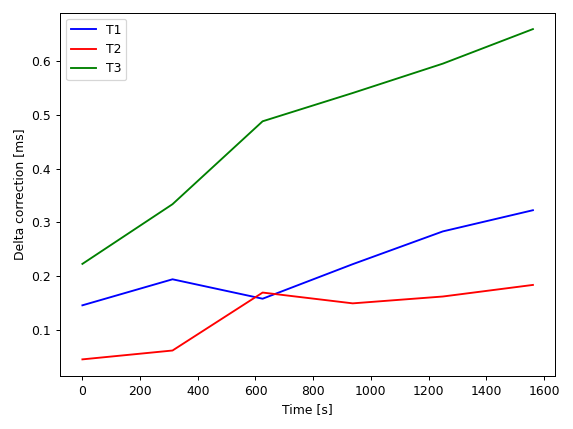

In [40]:
%matplotlib notebook
offset_timestamp_1 = delta_time_1[0]
fig, ax1 = plt.subplots() 
ax1.plot(np.array(delta_time_1)-offset_timestamp_1, np.array(delta_correction_1)*1000, color='b', label='T1')

offset_timestamp_2 = delta_time_2[0]
ax1.plot(np.array(delta_time_2)-offset_timestamp_2, np.array(delta_correction_2)*1000, color='r', label='T2')

offset_timestamp_3 = delta_time_3[0]
ax1.plot(np.array(delta_time_3)-offset_timestamp_3, np.array(delta_correction_3)*1000, color='g', label='T3')

plt.legend(loc='best')
ax1.set_ylabel("Delta correction [ms]")
ax1.set_xlabel("Time [s]")
plt.savefig("./figs/20220316_TimeCorrection.jpg")
plt.show()